# Partial EDA on Crash Dataset for Maryland

In [55]:
# install required packages, if not already installed. Please uncomment the lines below and run the script.

# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install shapley
# !pip install geopandas

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

can download the data from: 

`https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv?accessType=DOWNLOAD`

In [57]:
filename = '../data/Crash_Reporting_-_Drivers_Data.csv' # saved under data folder.

In [58]:
df = pd.read_csv(filename)

# checking the first 5 rows of the dataframe
df.head(5)

/var/folders/fj/r2kb_f4d3k1gxmcwsdc81_1r0000gn/T/ipykernel_34856/2144848518.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3170003V,240000438,Montgomery County Police,Property Damage Crash,01/03/2024 02:55:00 PM,NaN,NaN,NaN,NaN,IN FRONT OF 18900 BIRDSEYE DR,...,0,No,No,2017,LEXUS,SUV,NO MISUSE,39.165005,-77.249310,"(39.16500483, -77.24931)"
1,MCP3254003K,230072050,Montgomery County Police,Injury Crash,12/16/2023 12:36:00 PM,Maryland (State),GERMANTOWN RD,County,MIDDLEBROOK RD,NaN,...,35,No,No,2010,TOYT,PRIUS,NO MISUSE,39.178776,-77.267190,"(39.17877577, -77.26718974)"
2,EJ7887003Q,230074270,Gaithersburg Police Depar,Injury Crash,12/29/2023 12:00:00 PM,Maryland (State),GREAT SENECA HWY,Municipality,KENTLANDS BLVD,NaN,...,35,No,No,2021,SUBARU,FORRESTER,NO MISUSE,39.123574,-77.231769,"(39.12357374, -77.231769)"
3,MCP2674004J,230064598,Montgomery County Police,Property Damage Crash,11/05/2023 09:07:00 PM,Maryland (State),WOODFIELD RD,County,GLENDALOUGH RD,NaN,...,40,No,No,2019,DODGE,CHARGER,NO MISUSE,39.211742,-77.171461,"(39.21174219, -77.17146065)"
4,MCP25280008,230067019,Montgomery County Police,Property Damage Crash,11/18/2023 12:40:00 AM,Maryland (State),CLARKSBURG RD,Maryland (State),CLARKSBURG RD,NaN,...,20,No,No,2014,NISSAN,ROGUE,NaN,39.228915,-77.289091,"(39.22891483, -77.28909117)"


In [59]:
df.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [60]:
df.shape

(172105, 43)

### 1.	Crash Hotspots: Use latitude and longitude data to identify areas with high frequencies of crashes.

/opt/homebrew/anaconda3/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


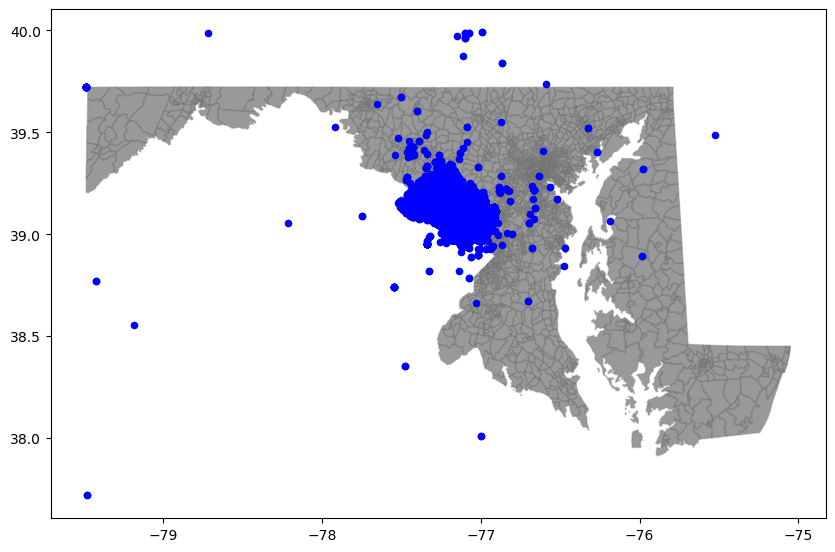

In [61]:

# Loading the Maryland state boundaries
md_boundaries = gpd.read_file('../data/cb_2018_24_bg_500k/cb_2018_24_bg_500k.shp')
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
crs = {'init': 'epsg:4326'}
geo_df = GeoDataFrame(df, crs=crs, geometry=geometry)

fig, ax = plt.subplots(figsize=(10,10))
md_boundaries.plot(ax=ax, alpha=0.4, color='black', edgecolor='grey', label='Maryland')
geo_df.plot(ax=ax, markersize=20, color='blue', marker='o', label='Crash')
plt.show()

most of these crashes from the visualized map looks like they happened in the Wanshingon DC area and Baltimore. There are some other crash locations outside the boundaries of the map, but the majority of the crashes are in the DC area.

### 2.	Road Type and Crashes: Compare crash rates on different types of roads (state, county, municipal).

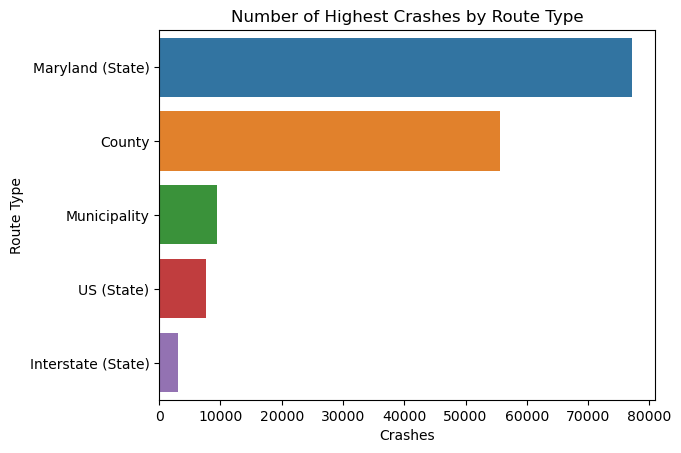

In [62]:
road_type = df['Route Type'].value_counts().reset_index()
road_type.columns = ['Route Type', 'Crashes']

# plotting the top 5 road types
sns.barplot(x='Crashes', y='Route Type', data=road_type.head(5))
plt.title('Number of Highest Crashes by Route Type')
plt.show()

Most of the crashes are on the Maryland state roads, followed by the county roads. the Interstate roads have the least number of crashes among the top 5 road types. Lets have a look at the routes which had least amount of crashes.

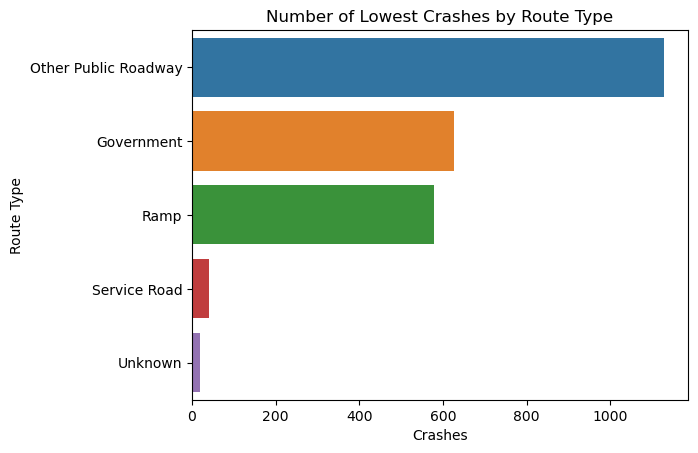

In [63]:
# plotting the bottom 5 road types
sns.barplot(x='Crashes', y='Route Type', data=road_type.tail(5))
plt.title('Number of Lowest Crashes by Route Type')
plt.show()

Unknown roads or undefined roads had the least number of crashes, followed by the service roads and then Ramps.

### 3.	Crashes by Municipality: Examine crash distribution across different municipalities to see if urban areas have more crashes compared to rural.

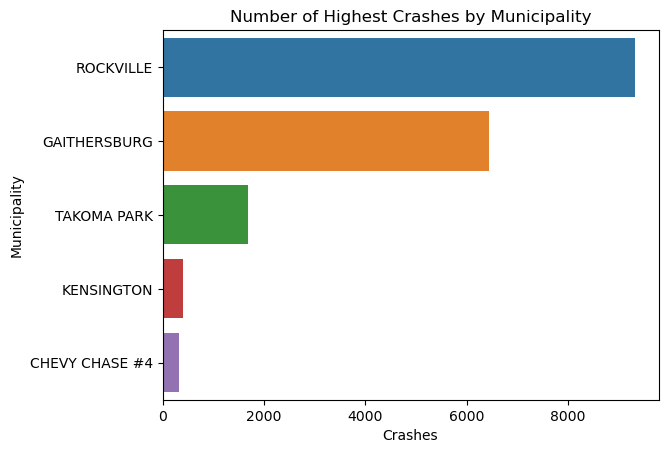

In [64]:
# Crashes by Municipality: Examine crash distribution across different municipalities to see if urban areas have more crashes compared to rural.

road_type = df['Municipality'].value_counts().reset_index()
road_type.columns = ['Municipality', 'Crashes']

# plotting the top 5 municipalities
sns.barplot(x='Crashes', y='Municipality', data=road_type.head(5))
plt.title('Number of Highest Crashes by Municipality')
plt.show()


Highest number of crashes are from the Rockville Municipality, followed by Gaitherburg and Takoma Park Municipality.

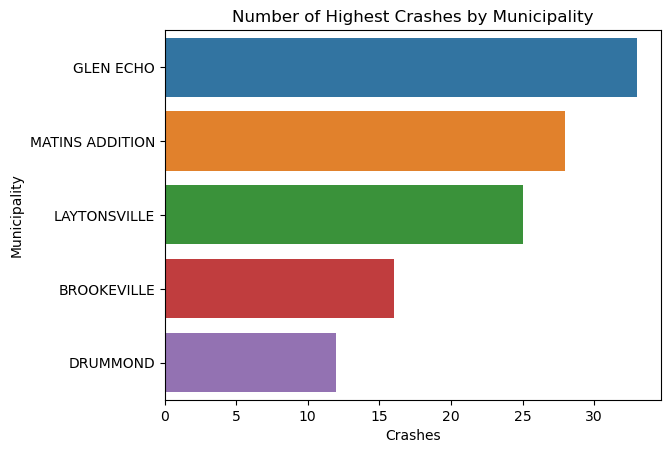

In [65]:
# plotting the bottom 5 municipalities
sns.barplot(x='Crashes', y='Municipality', data=road_type.tail(5))
plt.title('Number of Highest Crashes by Municipality')
plt.show()

Drummond Municipality had the least number of crashes among all the municipalities accounting for 12 crashes, followed by BrookVille and Laytonsville with 16 and 25 crashes respectively.

### 4.	Driver Fault and Substance Abuse: Explore the relationship between being at fault in a crash and substance abuse.

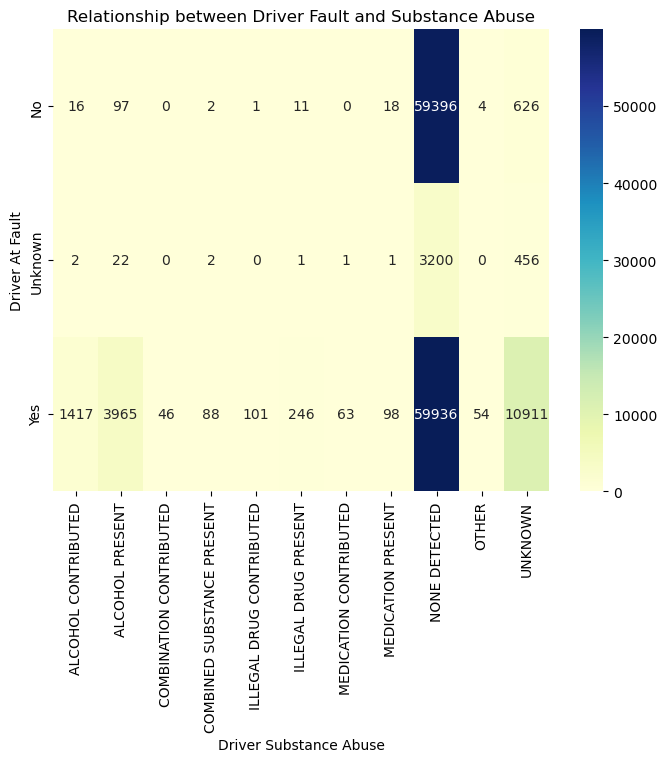

In [66]:
contingency_table = pd.crosstab(df['Driver At Fault'], df['Driver Substance Abuse'])

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Relationship between Driver Fault and Substance Abuse')
plt.xlabel('Driver Substance Abuse')
plt.ylabel('Driver At Fault')
plt.show()

most number if accidents with or without drivers fault occured without any substance abuse. The number of accidents with drivers fault and substance abuse is very less compared to the other categories.

Most of the accidents with drivers fault and substance abuse occured with alcohol, followed by drugs and then both alcohol and drugs.

### 5. Vehicle Type and Crash Severity: Analyze whether certain types of vehicles are more likely to be involved in severe crashes.

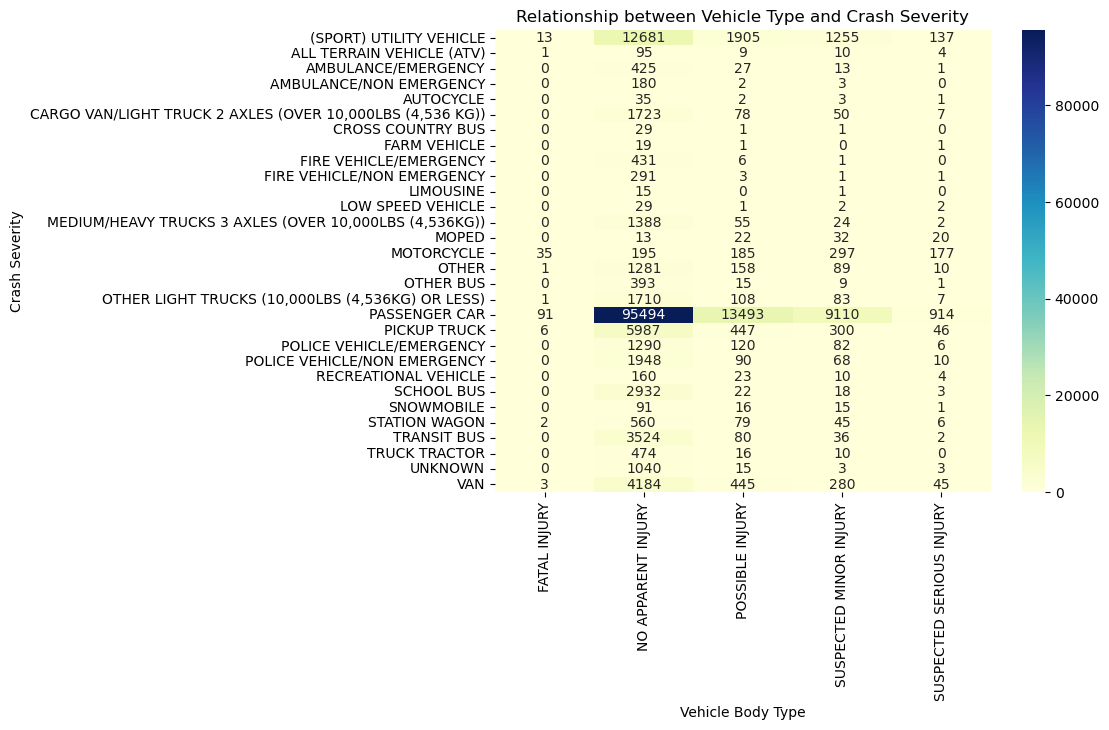

In [67]:
contingency_table = pd.crosstab(df['Vehicle Body Type'], df['Injury Severity'])

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Relationship between Vehicle Type and Crash Severity')
plt.xlabel('Vehicle Body Type')
plt.ylabel('Crash Severity')
plt.show()

Passenger cars are the most common vehicle type involved in crashes, followed by sports utlity vehicles and then pickup trucks, Fatal Injuries follow the same trend across all the vehicle types.

### 6.	Traffic Control and Crashes: Study the influence of traffic control devices (e.g., traffic signals, no controls) on crash occurrences and outcomes.

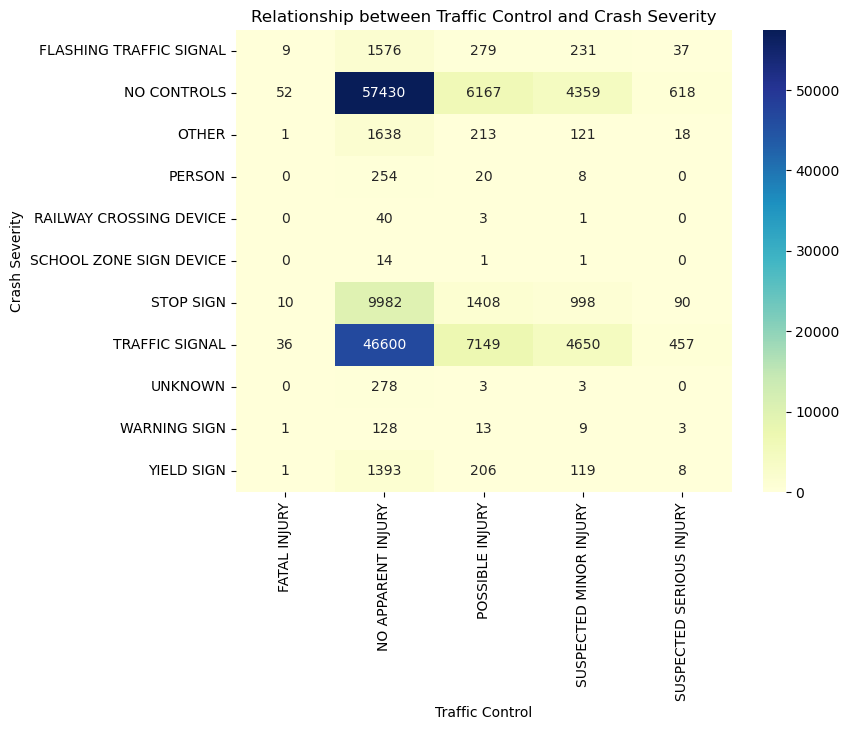

In [68]:

contingency_table = pd.crosstab(df['Traffic Control'], df['Injury Severity'])

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Relationship between Traffic Control and Crash Severity')
plt.xlabel('Traffic Control')
plt.ylabel('Crash Severity')
plt.show()

While analyzing these results, it is clear that the most number of crashes occured at the intersections with traffic signals, followed by the intersections with no controls and then the intersections with stop signs.

### 7.	Impact of Weather: Assess how different weather conditions affect the number of crashes.

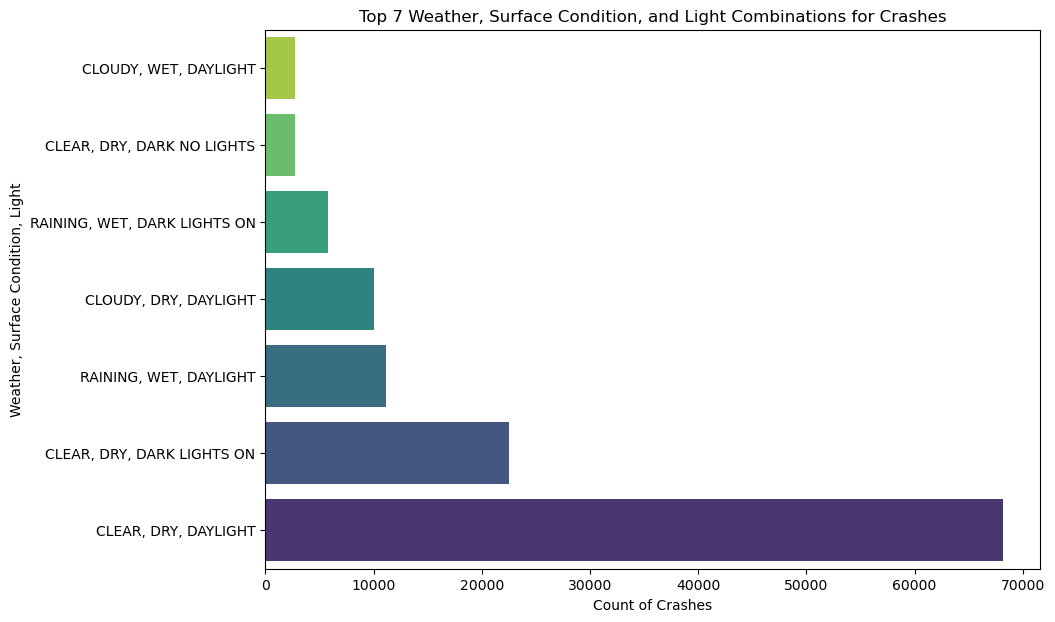

In [69]:

top_7 = df.groupby(['Weather', 'Surface Condition','Light']).size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(7)

# Creating a new column for the combined category label
top_7['Category'] = top_7['Weather'] + ', ' + top_7['Surface Condition'] + ', ' + top_7['Light']

# Plotting the data using seaborn
plt.figure(figsize=(10, 7))
sns.barplot(x='Count', y='Category', data=top_7, palette='viridis')
plt.xlabel('Count of Crashes')
plt.ylabel('Weather, Surface Condition, Light')
plt.title('Top 7 Weather, Surface Condition, and Light Combinations for Crashes')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

We can conclude that the majority of crashes occur in clear weather with dry surfaces and during daylight, totaling around 68,000 incidents. This is followed by conditions where daylight is absent but lights are on. This pattern is likely because Maryland typically experiences clear and dry weather conditions, leading to a higher number of incidents occurring under these conditions.

### 8. Correlation between Weather and Severity: Investigate if certain weather conditions lead to more severe crashes.

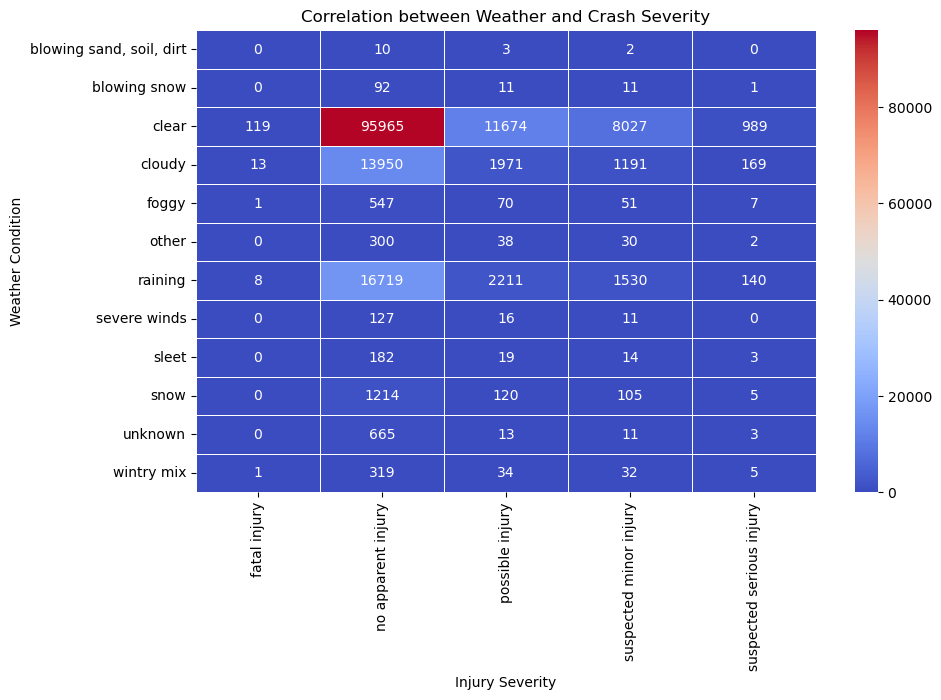

In [70]:
df['Weather'] = df['Weather'].str.lower().str.strip()
df['Injury Severity'] = df['Injury Severity'].str.lower().str.strip()

weather_severity = df.groupby(['Weather', 'Injury Severity']).size().unstack(fill_value=0)

# Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(weather_severity, annot=True, fmt="d", cmap="coolwarm", linewidths=.5)
plt.title('Correlation between Weather and Crash Severity')
plt.xlabel('Injury Severity')
plt.ylabel('Weather Condition')
plt.show()

The data indicates that clear weather conditions with dry surfaces and daylight contribute to the highest number of crashes, as evidenced by the approximately 95,965 incidents that fall under this category. This suggests a trend where crashes are more prevalent under seemingly optimal conditions. An explanation for this could be that Maryland typically experiences clear and dry weather, leading to a greater volume of vehicles on the road and hence a higher incidence rate. It’s noteworthy that crashes during daylight with lights on—when visibility is reduced—also represent a significant number of incidents, although to a lesser extent. This may reflect a higher level of caution among drivers when visibility is impaired, leading to fewer crashes than during clear daylight.

### 9. Types of Collisions: Analyze the frequency and severity of different types of collisions (e.g., rear-end, sideswipe).

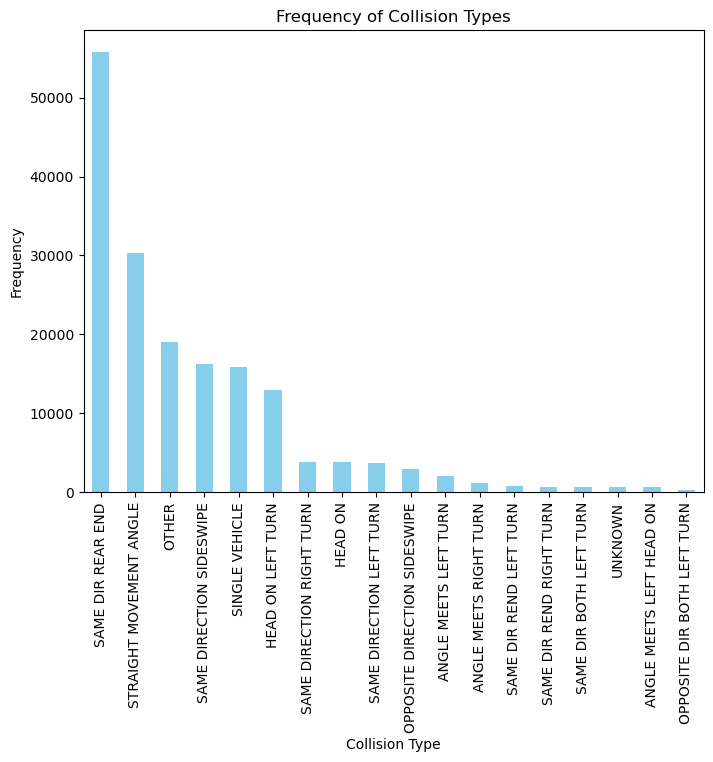

<Figure size 800x600 with 0 Axes>

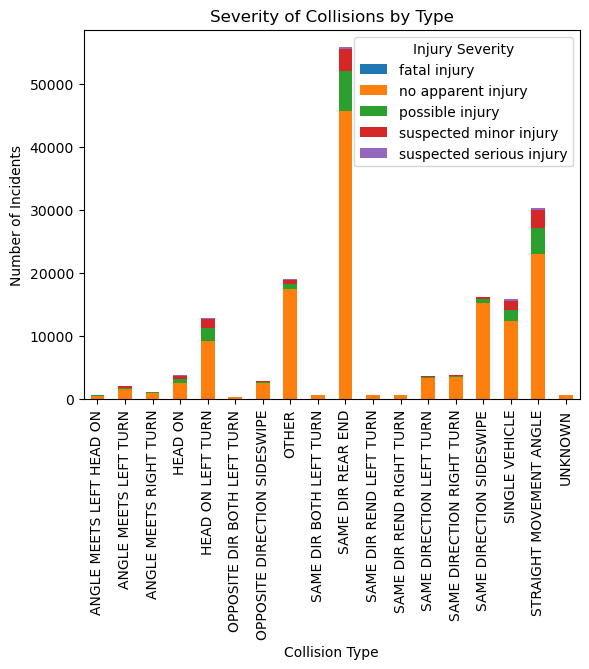

In [71]:
collision_counts = df['Collision Type'].value_counts()
collision_severity = df.groupby(['Collision Type', 'Injury Severity']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(8, 6))
collision_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Collision Types')
plt.xlabel('Collision Type')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
collision_severity.plot(kind='bar', stacked=True)
plt.title('Severity of Collisions by Type')
plt.xlabel('Collision Type')
plt.ylabel('Number of Incidents')
plt.legend(title='Injury Severity')
plt.show()

It is clear that the most common type of collision is a rear-end crash, which significantly outnumbers other types. 
The second most frequent collision type is a single vehicle incident, followed by angle collisions and sideswipes, which occur with somewhat similar frequencies. The least common types of collisions are related to turns, whether it be opposite direction, same direction right turn, or both left turn incidents. The prevalence of rear-end crashes may suggest issues such as tailgating, sudden stops, or distracted driving are prominent, whereas the less frequent turn-related crashes might indicate that these maneuvers pose a lower risk or that drivers are more cautious when performing them.

It’s evident that rear-end collisions are the most frequent, with a majority resulting in no apparent injury but a notable number of minor and serious injuries. The chart also highlights that while less common, head-on collisions and angle meets left turn accidents, though fewer in frequency, have a higher proportion of fatal, serious, and minor injuries, indicating these types of accidents are generally more severe. Overall, the chart conveys that the most common collision types may not necessarily correlate with the most severe outcomes in terms of injuries.

### 10.	Non-Motorist Involvement: Look into crashes involving bicyclists or pedestrians to identify patterns and risk factors.

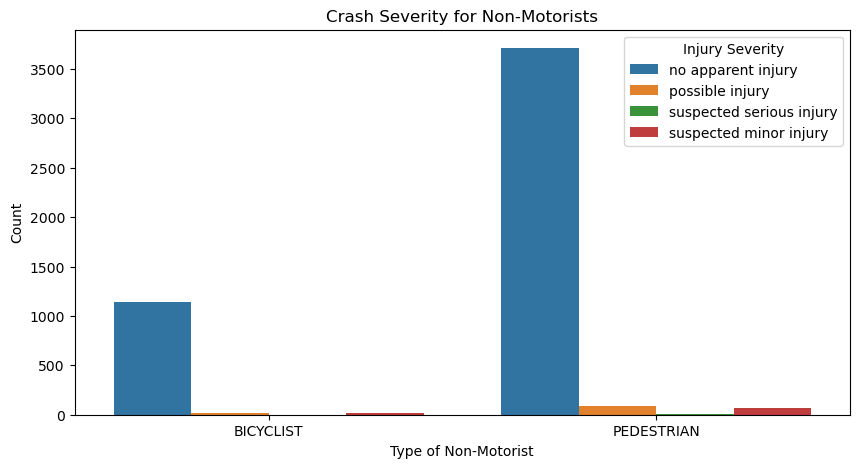

In [72]:
non_motorist_crashes = df[df['Related Non-Motorist'].isin(['BICYCLIST', 'PEDESTRIAN'])]

# Visualizing data
plt.figure(figsize=(10, 5))
sns.countplot(x='Related Non-Motorist', hue='Injury Severity', data=non_motorist_crashes)
plt.title('Crash Severity for Non-Motorists')
plt.xlabel('Type of Non-Motorist')
plt.ylabel('Count')
plt.legend(title='Injury Severity')
plt.show()

It shows that crashes involving pedestrians are substantially more frequent than those involving bicyclists. Furthermore, for both groups, the most common injury severity reported is "no apparent injury," followed by "possible injury," "suspected minor injury," and "suspected serious injury." Notably, the occurrence of suspected serious injuries is quite low for bicyclists, while for pedestrians, it is more pronounced, albeit still lower than the other categories. This data suggests that while pedestrians are more likely to be involved in a crash, the severity of injuries sustained by bicyclists and pedestrians varies, with pedestrians experiencing a greater proportion of serious injuries.

### 11. Injury Severity Analysis: Classify crashes by injury severity to identify factors that contribute to more severe outcomes.

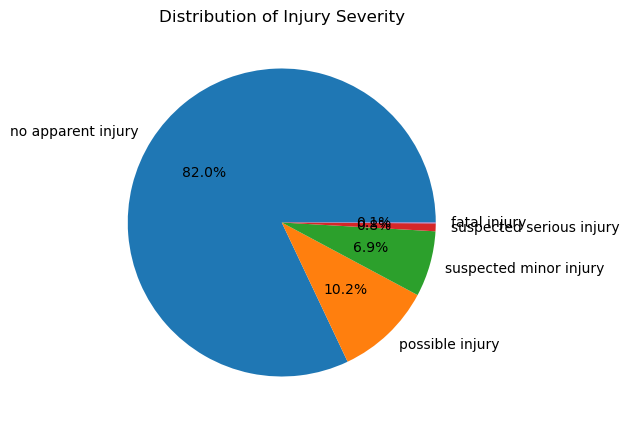

In [73]:

plt.figure(figsize=(8, 5))
df['Injury Severity'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Injury Severity')
plt.ylabel('')
plt.show()

# Binary encoding severity (assuming 'NO APPARENT INJURY' as '0' and all others as '1')
df['Severity_Code'] = (df['Injury Severity'] != 'NO APPARENT INJURY').astype(int)

# Selecting a subset of predictors
predictors = df[['Weather', 'Light', 'Traffic Control', 'Driver Substance Abuse']]
predictors = pd.get_dummies(predictors)

The largest segment, comprising 82% of the chart, indicates that most individuals involved in crashes have no apparent injury. Possible injuries account for 10.2% of the cases, suggesting minor impacts or uncertainties about the injuries' extent. Suspected minor injuries make up 6.9%, while suspected serious injuries are a smaller slice at 0.8%. Fatalities are the least common outcome, not visible in the chart, likely representing a very small percentage. This distribution underscores that while a significant majority of crashes do not result in visible injuries, there is still a noteworthy portion of incidents leading to varying levels of harm.

### 12. Driver Distraction: Identify common distractions leading to crashes and their impacts on crash severity.

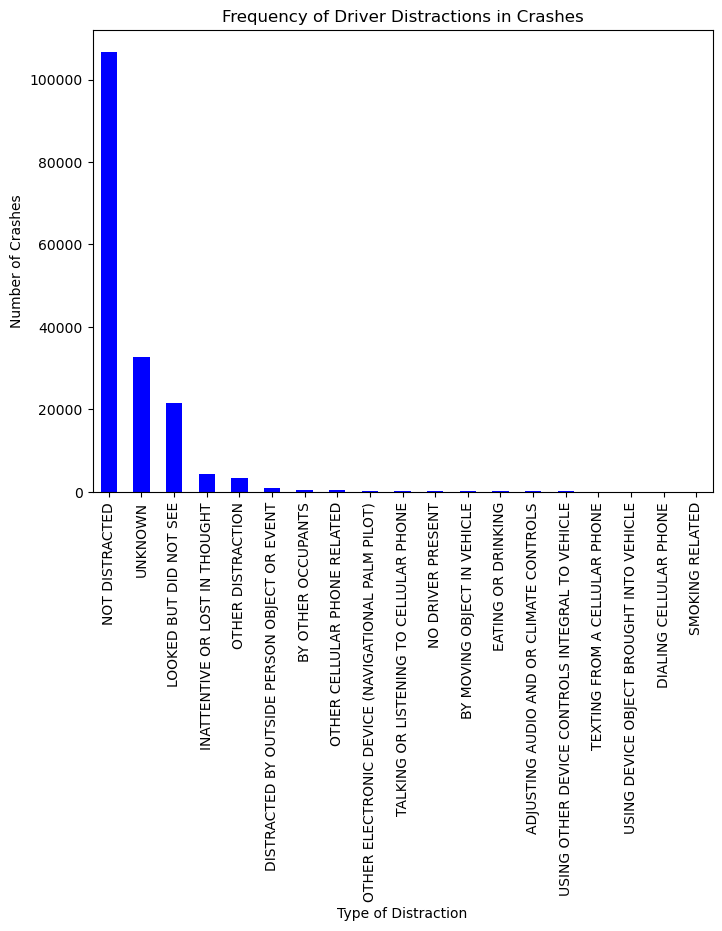

<Figure size 800x600 with 0 Axes>

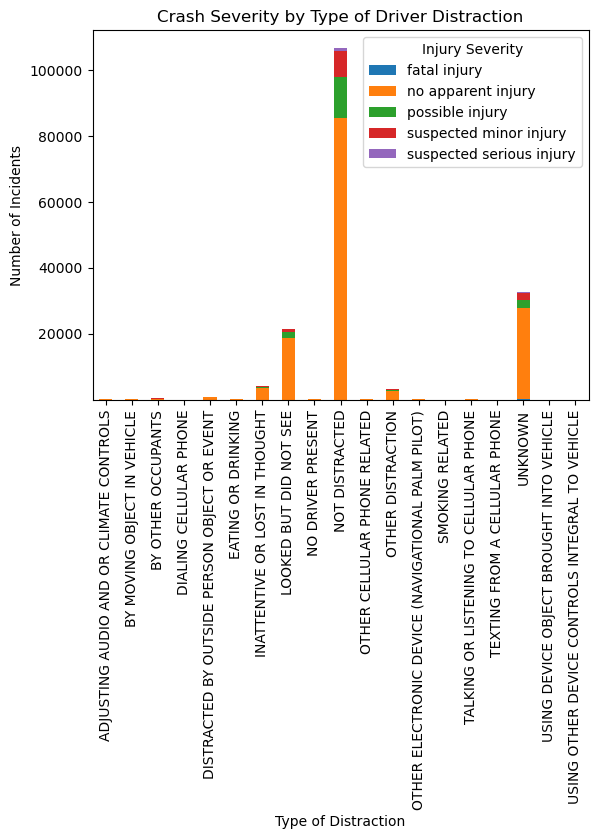

In [74]:
plt.figure(figsize=(8, 6))
df['Driver Distracted By'].value_counts().plot(kind='bar', color='blue')
plt.title('Frequency of Driver Distractions in Crashes')
plt.xlabel('Type of Distraction')
plt.ylabel('Number of Crashes')
plt.show()

plt.figure(figsize=(8, 6))
df.groupby(['Driver Distracted By', 'Injury Severity']).size().unstack(fill_value=0).plot(kind='bar', stacked=True)
plt.title('Crash Severity by Type of Driver Distraction')
plt.xlabel('Type of Distraction')
plt.ylabel('Number of Incidents')
plt.legend(title='Injury Severity')
plt.show()

The data reveals that the vast majority of crashes are attributed to drivers who are reportedly not distracted, suggesting that a lack of distraction does not necessarily equate to the absence of risk, with many of these incidents still leading to various injury levels. "Looked But Did Not See" ranks as the second most frequent distraction-related cause, implying that momentary lapses in attention or failure to recognize hazards are significant factors in crashes. While less common, distractions from phone use and other electronic devices are also notable for their injury associations. These findings highlight the complex nature of driving attentiveness and the need for increased focus behind the wheel to mitigate the risk of crashes.

### 13. Substance Abuse Impact: Analyze the data on driver and non-motorist substance abuse to see its correlation with crash causes and severity.

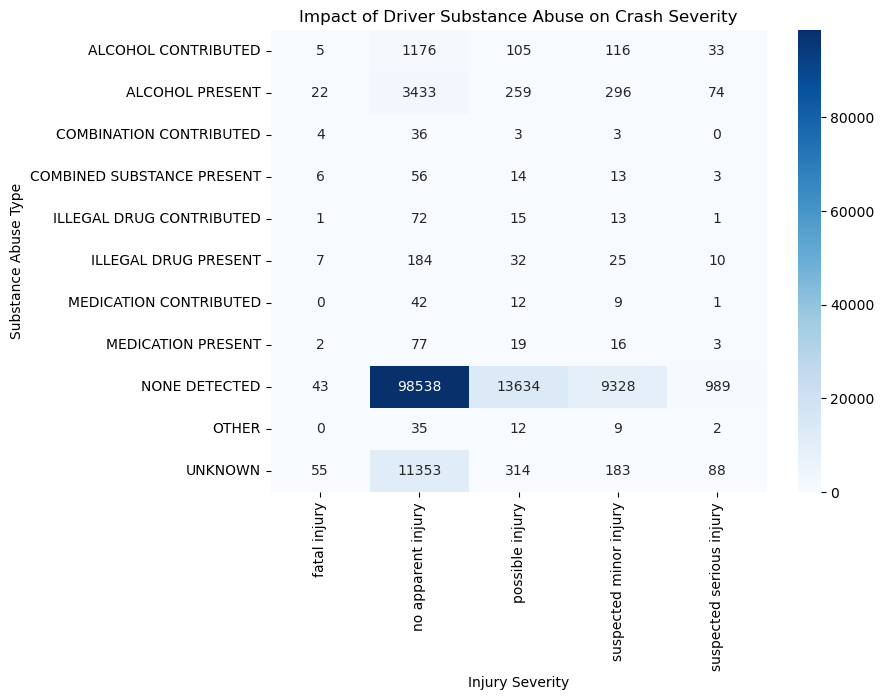

In [75]:
substance_impact = df.groupby(['Driver Substance Abuse', 'Injury Severity']).size().unstack(fill_value=0)

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(substance_impact, annot=True, cmap='Blues', fmt='d')
plt.title('Impact of Driver Substance Abuse on Crash Severity')
plt.xlabel('Injury Severity')
plt.ylabel('Substance Abuse Type')
plt.show()

the correlation between different types of substance abuse by drivers and the severity of crashes. A vast majority of the crashes involved drivers where no substance abuse was detected, followed by a significant number where substance abuse was unknown. Among the incidents involving substance abuse, those with alcohol present show higher frequencies across all severity levels compared to other substances. Incidents with illegal drugs present, though less frequent, still show a concerning correlation with injury severity. Overall, the data suggests that while substance abuse is a contributing factor in a smaller portion of the
total crashes, its presence is associated with an increased severity in injuries, highlighting the dangers of driving under the influence.